In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

# ER131 Final Project: CAISO Wholesale Energy Price Forecasting 
Fall 2020

In this cell, give an alphabetical (by last name) list of student group members.  Beside each student's name, provide a description of each student's contribution to the project.

## Basic Project Requirements (delete this markdown cell in your final submission)

**How to use this notebook**:  This notebook is the template for your semester project.  Each markdown cell provides instructions on what to do in order to complete a successful project.  The cell you're reading right now is the only one you can delete from what you eventually hand in.  For the other cells:
1. You may replace the instructions in each cell with your own work but do not edit the cell titles (with the exception of the project title, above).  
2. Follow the instructions in each section carefully.  For some sections you will enter only markdown text in the existing cells. For other sections, you'll accompany the markdown cells with additional code cells, and perhaps more markdown, before moving on to the next section.  

**Grading**.  You'll see point allocations listed in each of the section titles below.  In addition, there are other categories for points: 
1. Visualization (10 points).  Plots should be well organized, legible, labelled, and well-suited for the question they are being used to answer or explore.  
2. Clarity (5 points). Note that clarity also supports points elsewhere, because if we can't understand what you're explaining, we'll assume you didn't understand what you were doing and give points accordingly!  

For each Section or Category, we will give points according to the following percentage scale:
1. More than 90%:  work that is free of anything but superficial mistakes, and demonstrates creativity and / or a very deep understanding of what you are doing.
2. 80-90%: work without fundamental errors and demonstrates a basic understanding of what you're doing.
3. 60-80%: work with fundamental flaws in the analysis and / or conveys that you do not understand the basics of the work you are trying to do.
4. Below 60%: Work that is severely lacking or incomplete.  

Note that we distinguish *mistakes* from *"my idea didn't work"*.  Sometimes you don't know if you can actually do the thing you're trying to do and as you dig in you find that you can't.  That doesn't necessarily mean you made a mistake; it might just mean you needed more information.  We'll still give high marks to ambitious projects that "fail" at their stated objective, as long as that objective was clear and you demonstrate an understanding of what you were doing and why it didn't work.

**Number of prediction questions:**  The number of prediction questions must be greater than or equal to the number of students in the team minus one.  (A 4 person team would need to explore 4-1 = 3 questions.)  Questions should be related, but have distinct work efforts, interpretation and analysis. An example: for land use regression, you could have a core prediction question (what is pollution concentration on a fine spatial scale), a supporting question that explore how the degree of spatial aggregation influences prediction quality, plus a prediction model that explores *temporal* prediction at one point in space.  There is a lot of flexibility here; if you have any doubt about whether your questions are distinct, consult with the instructors.

**Data requirements**:  Projects must use data from a minimum of $1+N_s$ different sources, where $N_s$ is the number of students in the group.  You should merge at least two data sets. </font>

**Advice on Project Topics**:  We want you to do a project that relates to energy and environment topics.  

**Suggested data sets**: If you choose not to work on a client projets, here are some ideas for data starting points. You can definitely bring your own data to the table!
1. [Purple Air](https://www.purpleair.com) Instructions on how to download PurpleAir data are [here](https://docs.google.com/document/d/15ijz94dXJ-YAZLi9iZ_RaBwrZ4KtYeCy08goGBwnbCU/edit).
2. California Enviroscreen database.  Available [here].(https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30) 
3. Several data sets available from the UC Irvine machine learning library:
    1. [Forest Fires](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)
    4. [Climate](https://archive.ics.uci.edu/ml/datasets/Greenhouse+Gas+Observing+Network)
    5. [Ozone](https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection)
4. California Solar Initiative data (installed rooftop solar systems).  Available [here](https://www.californiasolarstatistics.ca.gov/data_downloads/).
5. World Bank Open Data, available [here](https://data.worldbank.org).
6. California ISO monitored emissions data, [here](http://www.caiso.com/TodaysOutlook/Pages/Emissions.aspx).
7. Energy Information Administration Residential Energy Consumption Survey, [here] (https://www.eia.gov/consumption/residential/data/2015/) 

## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~250 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

## Project Background (5 points)
In this section you will describe relevant background for your project.  It should give enough information that a non-expert can understand in detail the history and / or context of the system or setting you wish to study, the need for quantitative analysis, and, broadly, what impact a quantitative analyses could have on the system.  Shoot for 500 words here.

## Project Objective (5 points)
In this section you will pose the central objective or objectives for your semester project.  Objectives should be extremely clear, well-defined and clearly cast as forecasting problems.  

Some example questions: 
1. *"The purpose of this project is to train and evaluate different models to predict soil heavy metal contamination levels across the state of Louisiana, using a variety of features drawn from EPA, the US Census, and NAICS databases."* or
2. *"The purpose of this project is to train and evaluate different models to predict 1-minute generation from a UCSD solar PV site, up to 2 hours into the future, using historical data as well as basic weather forecast variables.*" or
3. *"The purpose of this project is to forecast daily emergency room visits for cardiac problems in 4 major US cities, using a majority of features including air quality forecasts, weather forecasts and seasonal variables."*

You should reflect here on why it's important to answer these questions.  In most cases this will mean that you'll frame the answers to your questions as informing one or more *resource allocation* problems.  If you have done a good job of providing project background (in the cell above) then this reflection will be short and easy to write.

**Comment on novelty:** You may find it hard to identify a project question that has *never* been answered before.  It's ok if you take inspiration from existing analyses.  However you shouldn't exactly reproduce someone else's analysis.  If you take inspiration from another analyses, you should still use different models, different data, and so on.

## Input Data Description (5 points)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  Where did you get the data?  How were the data collected from the original sources?
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions you provide for SGSTF. 

[Chapter 5](https://www.textbook.ds100.org/ch/05/eda_intro.html) of the DS100 textbook might be helpful for you in this section.

## Data Cleaning (10 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.  

[Chapter 4](https://www.textbook.ds100.org/ch/04/cleaning_intro.html) of the DS100 textbook might be helpful to you in this section.  

<h3>Demand (Proxy for System Load)</h3
 >

In [3]:
#unzip all zipped files in Demand folder. Comment out once complete
demand_folder = 'Demand' 
for item in os.listdir(demand_folder): #iterate through files in folder
    file_name = os.path.abspath(item)[13:] # get full path of files
    zip_ref = zipfile.ZipFile('Demand/' + file_name) # create zipfile object
    zip_ref.extractall(demand_folder) # extract file to dir
    zip_ref.close() # close file

In [4]:
#create dataframe to append data to 
demand_folder = 'Demand' 
demand_all = pd.DataFrame(columns = ['INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT','LOAD_TYPE','OPR_DT','OPR_HR','OPR_INTERVAL','MARKET_RUN_ID','TAC_AREA_NAME','LABEL','XML_DATA_ITEM','POS','MW','EXECUTION_TYPE','GROUP'])

In [5]:
for item in os.listdir(demand_folder):
     if item.endswith('.csv'):
        file_name = os.path.abspath(item)[13:]
        df = pd.read_csv('Demand/' + file_name)
        demand_all = demand_all.append(df)

In [6]:
demand_all

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,2019-12-01T07:00:00-00:00,2019-12-01T08:00:00-00:00,0,2019-11-30,24,0,ACTUAL,AZPS,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.8,2733,ACTUAL,1
1,2019-12-01T07:00:00-00:00,2019-12-01T08:00:00-00:00,0,2019-11-30,24,0,ACTUAL,BANCSMUD,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.8,1074,ACTUAL,2
2,2019-12-01T07:00:00-00:00,2019-12-01T08:00:00-00:00,0,2019-11-30,24,0,ACTUAL,BCHA,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.8,8112,ACTUAL,3
3,2019-12-01T07:00:00-00:00,2019-12-01T08:00:00-00:00,0,2019-11-30,24,0,ACTUAL,CA ISO-TAC,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.0,22190,ACTUAL,4
4,2019-12-01T07:00:00-00:00,2019-12-01T08:00:00-00:00,0,2019-11-30,24,0,ACTUAL,IPCO,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.8,1885,ACTUAL,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2018-12-31T04:00:00-00:00,2018-12-31T05:00:00-00:00,0,2018-12-30,21,0,ACTUAL,VEA-TAC,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.5,80,ACTUAL,434
10076,2018-12-30T10:00:00-00:00,2018-12-30T11:00:00-00:00,0,2018-12-30,3,0,ACTUAL,VEA-TAC,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.5,90,ACTUAL,434
10077,2018-12-30T16:00:00-00:00,2018-12-30T17:00:00-00:00,0,2018-12-30,9,0,ACTUAL,VEA-TAC,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.5,102,ACTUAL,434
10078,2018-12-30T17:00:00-00:00,2018-12-30T18:00:00-00:00,0,2018-12-30,10,0,ACTUAL,VEA-TAC,Total Actual Hourly Integrated Load,SYS_FCST_ACT_MW,3.5,90,ACTUAL,434


In [7]:
demand_caiso = demand_all[demand_all['TAC_AREA_NAME'] == 'CA ISO-TAC'] #get entries for all of CAISO, not individual zones
demand_caiso['OPR_DT'] = pd.to_datetime(demand_caiso.OPR_DT) #turn this column to DateTime object for sorting
demand_caiso = demand_caiso[['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','MW']]
demand_caiso.rename(columns={"MW": "CAISO SYSTEM LOAD (MW)"}, inplace=True) #using demand as a proxy for system load, since supply = demand
demand_caiso.sort_values(by=['OPR_DT','OPR_HR']) #ready for merge

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,INTERVALSTARTTIME_GMT,OPR_DT,OPR_HR,CAISO SYSTEM LOAD (MW)
33,2017-09-01T07:00:00-00:00,2017-09-01,1,30961
31,2017-09-01T08:00:00-00:00,2017-09-01,2,29137
42,2017-09-01T09:00:00-00:00,2017-09-01,3,27773
34,2017-09-01T10:00:00-00:00,2017-09-01,4,27322
24,2017-09-01T11:00:00-00:00,2017-09-01,5,27435
...,...,...,...,...
11516,2020-11-30T02:00:00-00:00,2020-11-29,19,26257
11511,2020-11-30T03:00:00-00:00,2020-11-29,20,25782
11524,2020-11-30T04:00:00-00:00,2020-11-29,21,25056
11530,2020-11-30T05:00:00-00:00,2020-11-29,22,23987


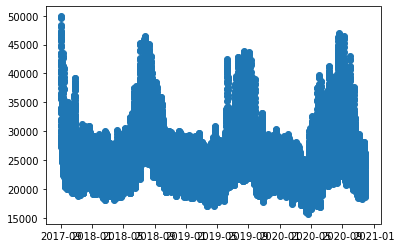

In [8]:
plt.scatter(demand_caiso['OPR_DT'], demand_caiso['CAISO SYSTEM LOAD (MW)'])

<h3>Wind and Solar Generation</h3>

In [9]:
#unzip all zipped files in Renewable forecast folder. Comment out once complete
ren_folder = 'Solar and Wind forecasts' 
for item in os.listdir(ren_folder): #iterate through files in folder
    file_name = os.path.abspath(item)[13:] # get full path of files
    zip_ref = zipfile.ZipFile('Solar and Wind forecasts/' + file_name) # create zipfile object
    zip_ref.extractall(ren_folder) # extract file to dir
    zip_ref.close() # close file

In [10]:
ren_folder = 'Solar and Wind forecasts' 
ren_all = pd.DataFrame(columns = ['OPR_DT','OPR_HR','OPR_INTERVAL','INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT','TRADING_HUB','RENEWABLE_TYPE','LABEL','XML_DATA_ITEM','MARKET_RUN_ID_POS','RENEW_POS','MW','MARKET_RUN_ID','GROUP'])

In [11]:
for item in os.listdir(ren_folder):
     if item.endswith('.csv'):
        file_name = os.path.abspath(item)[13:]
        df = pd.read_csv('Solar and Wind forecasts/' + file_name)
        ren_all = ren_all.append(df)

In [12]:
ren_all['OPR_DT'] = pd.to_datetime(ren_all.OPR_DT) #turn this column to DateTime object for sorting
ren_all.sort_values(by=['OPR_DT','OPR_HR'])

,OPR_DT,OPR_HR,OPR_INTERVAL,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,TRADING_HUB,RENEWABLE_TYPE,LABEL,XML_DATA_ITEM,MARKET_RUN_ID_POS,RENEW_POS,MW,MARKET_RUN_ID,GROUP
23,2017-09-01,1,0,2017-09-01T07:00:00-00:00,2017-09-01T08:00:00-00:00,NP15,Solar,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,3,-2.76454,ACTUAL,1
35,2017-09-01,1,0,2017-09-01T07:00:00-00:00,2017-09-01T08:00:00-00:00,NP15,Wind,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,1,2.42960,ACTUAL,2
71,2017-09-01,1,0,2017-09-01T07:00:00-00:00,2017-09-01T08:00:00-00:00,SP15,Solar,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,3,-23.51139,ACTUAL,3
83,2017-09-01,1,0,2017-09-01T07:00:00-00:00,2017-09-01T08:00:00-00:00,SP15,Wind,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,1,529.24060,ACTUAL,4
108,2017-09-01,1,0,2017-09-01T07:00:00-00:00,2017-09-01T08:00:00-00:00,ZP26,Solar,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,3,-4.52870,ACTUAL,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2020-11-29,23,0,2020-11-30T06:00:00-00:00,2020-11-30T07:00:00-00:00,NP15,Solar,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,3,-3.57801,ACTUAL,141
3387,2020-11-29,23,0,2020-11-30T06:00:00-00:00,2020-11-30T07:00:00-00:00,NP15,Wind,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,1,14.04170,ACTUAL,142
3415,2020-11-29,23,0,2020-11-30T06:00:00-00:00,2020-11-30T07:00:00-00:00,SP15,Solar,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,3,-26.61843,ACTUAL,143
3438,2020-11-29,23,0,2020-11-30T06:00:00-00:00,2020-11-30T07:00:00-00:00,SP15,Wind,Renewable Forecast Actual Generation,RENEW_FCST_ACT_MW,3,1,123.59409,ACTUAL,144


In [13]:
ren = ren_all.pivot_table(values = 'MW', 
                    index = 'INTERVALSTARTTIME_GMT', 
                    columns = ['TRADING_HUB'],
                    aggfunc = sum)
ren

TRADING_HUB,NP15,SP15,ZP26
INTERVALSTARTTIME_GMT,,,
2017-09-01T07:00:00-00:00,-0.33494,505.72921,-4.52870
2017-09-01T08:00:00-00:00,-4.38135,313.97235,-4.54797
2017-09-01T09:00:00-00:00,-6.88589,152.73201,-4.53026
2017-09-01T10:00:00-00:00,-7.54629,106.57848,-4.50568
2017-09-01T11:00:00-00:00,28.72493,6.53310,-4.47765
...,...,...,...
2020-11-30T02:00:00-00:00,15.99573,106.76529,-5.62428
2020-11-30T03:00:00-00:00,10.86688,108.45589,-5.63222
2020-11-30T04:00:00-00:00,3.95279,100.64764,-5.57463


In [14]:
ren['Total Wind/Solar Generation (MW)'] = ren['NP15'] + ren['SP15'] + ren['ZP26']
ren.rename(columns={"NP15": "NP15 Renewables (MW)","SP15": "SP15 Renewables (MW)","ZP26": "ZP26 Renewables (MW)" }, inplace=True)

In [15]:
ren #ready for merge

TRADING_HUB,NP15 Renewables (MW),SP15 Renewables (MW),ZP26 Renewables (MW),Total Wind/Solar Generation (MW)
INTERVALSTARTTIME_GMT,,,,
2017-09-01T07:00:00-00:00,-0.33494,505.72921,-4.52870,500.86557
2017-09-01T08:00:00-00:00,-4.38135,313.97235,-4.54797,305.04303
2017-09-01T09:00:00-00:00,-6.88589,152.73201,-4.53026,141.31586
2017-09-01T10:00:00-00:00,-7.54629,106.57848,-4.50568,94.52651
2017-09-01T11:00:00-00:00,28.72493,6.53310,-4.47765,30.78038
...,...,...,...,...
2020-11-30T02:00:00-00:00,15.99573,106.76529,-5.62428,117.13674
2020-11-30T03:00:00-00:00,10.86688,108.45589,-5.63222,113.69055
2020-11-30T04:00:00-00:00,3.95279,100.64764,-5.57463,99.02580


In [16]:
solar = ren_all[ren_all['RENEWABLE_TYPE'] == 'Solar']
solar_pivot = solar.pivot_table(values = 'MW', 
                    index = 'INTERVALSTARTTIME_GMT', 
                    columns = ['TRADING_HUB'])
solar_pivot['CAISO Actual PV Generation'] = solar_pivot['NP15'] + solar_pivot['SP15'] + solar_pivot['ZP26']
solar_gen = solar_pivot[['CAISO Actual PV Generation']]
solar_gen #ready for merge

TRADING_HUB,CAISO Actual PV Generation
INTERVALSTARTTIME_GMT,
2017-09-01T07:00:00-00:00,-30.80463
2017-09-01T08:00:00-00:00,-30.74472
2017-09-01T09:00:00-00:00,-30.21999
2017-09-01T10:00:00-00:00,-31.63246
2017-09-01T11:00:00-00:00,-33.08414
...,...
2020-11-30T02:00:00-00:00,-36.68850
2020-11-30T03:00:00-00:00,-35.84548
2020-11-30T04:00:00-00:00,-35.77169


<h3>Natural Gas Prices</h3>

In [17]:
gas_prices = pd.read_csv('Natural Gas Prices/natural_gas_prices_historical.csv')

In [18]:
gas_prices['OPR_DT'] = pd.to_datetime(gas_prices.Date) #ready to be merged with demand dataframe
gas_prices

,Date,SNL Natural Gas NoCal Border Malin Spot Natural Gas Index (Price/Value),SNL Natural Gas NW Stanfield OR Spot Natural Gas Index (Price/Value),SNL Natural Gas NW Sumas Spot Natural Gas Index (Price/Value),SNL Natural Gas PG&E Gate Spot Natural Gas Index (Price/Value),SNL Natural Gas PG&E South Spot Natural Gas Index (Price/Value),SNL Natural Gas SoCal Border Spot Natural Gas Index (Price/Value),SNL Natural Gas SoCal Citygate Spot Natural Gas Index (Price/Value),SNL Natural Gas West Coast Sta 2 Spot Natural Gas Index (Price/Value),OPR_DT
0,12/8/2015,2.130,1.910,1.875,2.589,2.214,2.210,2.404,1.296,2015-12-08
1,12/9/2015,2.024,1.870,1.826,2.505,2.000,2.012,2.127,0.756,2015-12-09
2,12/10/2015,2.119,2.000,1.924,2.571,2.170,2.171,2.347,0.951,2015-12-10
3,12/11/2015,2.112,2.015,1.970,2.498,2.170,2.148,2.335,0.996,2015-12-11
4,12/14/2015,1.893,1.960,1.905,2.460,1.990,1.913,2.098,0.787,2015-12-14
...,...,...,...,...,...,...,...,...,...,...
1253,12/2/2020,3.148,3.120,3.130,3.648,2.780,3.746,4.757,2.002,2020-12-02
1254,12/3/2020,3.335,3.300,3.214,3.704,2.800,3.875,4.882,1.902,2020-12-03
1255,12/4/2020,3.300,3.320,3.270,3.485,2.500,4.327,5.070,1.811,2020-12-04
1256,12/7/2020,3.178,3.150,3.110,3.453,2.320,3.231,4.371,1.683,2020-12-07


<h3>Ancillary Services</h3>

In [19]:
#unzip all zipped files in AS forecast folder. Comment out once complete
as_folder = 'Ancillary Services' 
for item in os.listdir(as_folder): #iterate through files in folder
    file_name = os.path.abspath(item)[13:] # get full path of files
    zip_ref = zipfile.ZipFile('Ancillary Services/' + file_name) # create zipfile object
    zip_ref.extractall(as_folder) # extract file to dir
    zip_ref.close() # close file

In [20]:
as_folder = 'Ancillary Services' 
as_all = pd.DataFrame(columns = ['INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT','OPR_DT','OPR_HR','OPR_INTERVAL','ANC_TYPE','ANC_REGION','GRP','MARKET_RUN_ID','RESULT_TYPE','UOM','POS','XML_DATA_ITEM','MW','GROUP'])

In [21]:
for item in os.listdir(as_folder):
     if item.endswith('.csv'):
        file_name = os.path.abspath(item)[13:]
        df = pd.read_csv('Ancillary Services/' + file_name)
        as_all = as_all.append(df)

In [22]:
print(as_all.ANC_TYPE.unique())
as_amt = as_all[(as_all['RESULT_TYPE'] == 'AS_MW') & (as_all['OPR_INTERVAL']==1)]

['NR' 'RD' 'RU' 'SR']


In [23]:
as_amt = as_amt.pivot_table(values='MW',
                   index = 'INTERVALSTARTTIME_GMT',
                   columns ='ANC_TYPE')
as_amt.rename(columns={"NR": "NR Amt (MWh)","RD": "RD Amt (MWh)","RU": "RU Amt (MWh)","SR": "SR Amt (MWh)"}, inplace=True)
as_amt #ready for merge

ANC_TYPE,NR Amt (MWh),RD Amt (MWh),RU Amt (MWh),SR Amt (MWh)
INTERVALSTARTTIME_GMT,,,,
2017-09-01T07:00:00-00:00,315.00,0.00,0.00,-2.86
2017-09-01T08:00:00-00:00,0.00,0.00,0.00,-8.20
2017-09-01T09:00:00-00:00,2.47,0.00,0.00,4.11
2017-09-01T10:00:00-00:00,280.25,0.00,0.00,-60.01
2017-09-01T11:00:00-00:00,0.00,0.00,0.00,-69.98
...,...,...,...,...
2020-11-30T02:00:00-00:00,44.39,0.00,0.19,43.71
2020-11-30T03:00:00-00:00,31.89,0.11,31.42,0.70
2020-11-30T04:00:00-00:00,31.89,0.00,10.58,21.08


<h3>Real-time Energy Prices</h3>

In [24]:
#unzip all zipped files in AS forecast folder. Comment out once complete
rt_folder = 'RT LMP' 
for item in os.listdir(rt_folder): #iterate through files in folder
    file_name = os.path.abspath(item)[13:] # get full path of files
    zip_ref = zipfile.ZipFile('RT LMP/' + file_name) # create zipfile object
    zip_ref.extractall(rt_folder) # extract file to dir
    zip_ref.close() # close file

In [25]:
rt_folder = 'RT LMP' 
rt_all = pd.DataFrame(columns = ['INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT','OPR_DT','OPR_HR','NODE_ID_XML','NODE_ID','NODE','MARKET_RUN_ID','LMP_TYPE','XML_DATA_ITEM','PNODE_RESMRID','GRP_TYPE','POS','MW','OPR_INTERVAL','GROUP'])

In [26]:
for item in os.listdir(rt_folder):
     if item.endswith('.csv'):
        file_name = os.path.abspath(item)[13:]
        df = pd.read_csv('RT LMP/' + file_name)
        df = df[(df['LMP_TYPE'] == 'LMP') & (df['OPR_INTERVAL'] == 1)]
        rt_all = rt_all.append(df)

In [27]:
rt_all

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,OPR_INTERVAL,GROUP,VALUE
1152,2018-07-01T07:00:00-00:00,2018-07-01T07:05:00-00:00,2018-07-01,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,LMP,LMP_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,NaN,1,5,25.75116
1164,2018-07-01T08:00:00-00:00,2018-07-01T08:05:00-00:00,2018-07-01,2,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,LMP,LMP_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,NaN,1,5,24.28932
1176,2018-07-01T09:00:00-00:00,2018-07-01T09:05:00-00:00,2018-07-01,3,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,LMP,LMP_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,NaN,1,5,21.65944
1188,2018-07-01T10:00:00-00:00,2018-07-01T10:05:00-00:00,2018-07-01,4,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,LMP,LMP_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,NaN,1,5,21.04702
1200,2018-07-01T11:00:00-00:00,2018-07-01T11:05:00-00:00,2018-07-01,5,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,LMP,LMP_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,NaN,1,5,22.25010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133860,2020-08-01T02:00:00-00:00,2020-08-01T02:05:00-00:00,2020-07-31,20,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,RTM,LMP,LMP_PRC,TH_ZP26_GEN-APND,ALL_APNODES,0,NaN,1,465,65.24502
133872,2020-08-01T03:00:00-00:00,2020-08-01T03:05:00-00:00,2020-07-31,21,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,RTM,LMP,LMP_PRC,TH_ZP26_GEN-APND,ALL_APNODES,0,NaN,1,465,26.97691
133884,2020-08-01T04:00:00-00:00,2020-08-01T04:05:00-00:00,2020-07-31,22,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,RTM,LMP,LMP_PRC,TH_ZP26_GEN-APND,ALL_APNODES,0,NaN,1,465,30.44319
133896,2020-08-01T05:00:00-00:00,2020-08-01T05:05:00-00:00,2020-07-31,23,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,TH_ZP26_GEN-APND,RTM,LMP,LMP_PRC,TH_ZP26_GEN-APND,ALL_APNODES,0,NaN,1,465,29.96471


In [28]:
rt_pivot = rt_all.pivot_table(values='VALUE',
                   index = 'INTERVALSTARTTIME_GMT',
                   columns ='NODE')
rt_pivot #ready for merge

NODE,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND
INTERVALSTARTTIME_GMT,,,
2018-01-01T08:00:00-00:00,38.89844,38.85151,38.51520
2018-01-01T09:00:00-00:00,53.47387,53.12486,52.85102
2018-01-01T10:00:00-00:00,40.47073,40.18667,40.02434
2018-01-01T11:00:00-00:00,37.84954,37.65957,37.46201
2018-01-01T12:00:00-00:00,40.48311,40.15407,40.02002
...,...,...,...
2020-12-01T03:00:00-00:00,48.88449,41.41602,46.96128
2020-12-01T04:00:00-00:00,53.97973,46.26539,52.90968
2020-12-01T05:00:00-00:00,64.81115,51.08321,66.61341


<h3>CEC Long-Term Forecasts</h3>

In [29]:
cec_PGE = pd.DataFrame(columns=['Date/Hour (PST)','Year','Month','Day','Hour Beginning','Hour Ending','PG&E Hourly Load','PG&E Hourly PV Generation '])
cec_SCE = pd.DataFrame(columns=['Date/Hour (PST)','Year','Month','Day','Hour Beginning','Hour Ending','SCE Hourly Load','SCE Hourly PV Generation'])
cec_SDGE = pd.DataFrame(columns=['Date/Hour (PST)','Year','Month','Day','Hour Beginning','Hour Ending','SDGE Hourly Load','SDGE Hourly PV Generation'])

In [30]:
cec_folder = 'CEC Long-term Forecasts' 
for item in os.listdir(cec_folder): #iterate through files in folder
    if item.endswith('.csv'):
        file_name = os.path.abspath(item)[13:]
        if 'PGE' in file_name:
            df = pd.read_csv('CEC Long-term Forecasts/' + file_name)
            cec_PGE = cec_PGE.append(df)
        if 'SCE' in file_name:
            df = pd.read_csv('CEC Long-term Forecasts/' + file_name)
            cec_SCE = cec_SCE.append(df)
        if 'SDGE' in file_name:
            df = pd.read_csv('CEC Long-term Forecasts/' + file_name)
            cec_SDGE = cec_SDGE.append(df)

            cec_PGE = cec_PGE.iloc[:,0:8]

In [31]:
cec_PGE

,Date/Hour (PST),Year,Month,Day,Hour Beginning,Hour Ending,PG&E Hourly Load,PG&E Hourly PV Generation
0,1/1/2027 0:00,2027,1,1,0,1,"11,189",0.0
1,1/1/2027 1:00,2027,1,1,1,2,"10,763",0.0
2,1/1/2027 2:00,2027,1,1,2,3,"10,556",0.0
3,1/1/2027 3:00,2027,1,1,3,4,"10,373",0.0
4,1/1/2027 4:00,2027,1,1,4,5,"10,334",0.0
...,...,...,...,...,...,...,...,...
43795,12/31/2021 19:00,2021,12,31,19,20,"13,980",0.0
43796,12/31/2021 20:00,2021,12,31,20,21,"13,593",0.0
43797,12/31/2021 21:00,2021,12,31,21,22,"13,054",0.0
43798,12/31/2021 22:00,2021,12,31,22,23,"12,030",0.0


In [32]:
merge1 = pd.merge(cec_PGE, cec_SCE)
cec_all = pd.merge(merge1, cec_SDGE)
cec_all

,Date/Hour (PST),Year,Month,Day,Hour Beginning,Hour Ending,PG&E Hourly Load,PG&E Hourly PV Generation,SCE Hourly Load,SCE Hourly PV Generation,SDGE Hourly Load,SDGE Hourly PV Generation
0,1/1/2027 0:00,2027,1,1,0,1,"11,189",0.0,"11,595",0.0,"2,395",0.0
1,1/1/2027 1:00,2027,1,1,1,2,"10,763",0.0,"11,189",0.0,"2,250",0.0
2,1/1/2027 2:00,2027,1,1,2,3,"10,556",0.0,"10,777",0.0,"2,157",0.0
3,1/1/2027 3:00,2027,1,1,3,4,"10,373",0.0,"10,528",0.0,"2,096",0.0
4,1/1/2027 4:00,2027,1,1,4,5,"10,334",0.0,"10,499",0.0,"2,094",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122635,12/31/2021 19:00,2021,12,31,19,20,"13,980",0.0,"13,104",0.0,"2,929",0.0
122636,12/31/2021 20:00,2021,12,31,20,21,"13,593",0.0,"12,643",0.0,"2,794",0.0
122637,12/31/2021 21:00,2021,12,31,21,22,"13,054",0.0,"12,100",0.0,"2,645",0.0
122638,12/31/2021 22:00,2021,12,31,22,23,"12,030",0.0,"11,748",0.0,"2,491",0.0


In [33]:
#the values in load columns are strings, need to do some formatting to turn them into ints:
cec_all['PG&E Hourly Load'] = [int(i[1:-1].replace(",", "")) for i in cec_all['PG&E Hourly Load']]
cec_all['SCE Hourly Load'] = [int(i[1:-1].replace(",", "")) for i in cec_all['SCE Hourly Load']]
cec_all['SDGE Hourly Load'] = [int(i[1:-1].replace(",", "")) for i in cec_all['SDGE Hourly Load']]

In [34]:
cec_all['Systemwide Load Forecast'] = cec_all['PG&E Hourly Load'] + cec_all['SCE Hourly Load'] + cec_all['SDGE Hourly Load']
cec_all['Systemwide PV Forecast'] = cec_all['PG&E Hourly PV Generation '] + cec_all['SCE Hourly PV Generation'] + cec_all['SDGE Hourly PV Generation']

In [35]:
array = []
for i in range(len(cec_all['Year'])):
    timestamp = str(cec_all['Year'][i]) + '-' + str(cec_all['Month'][i]) + '-' + str(cec_all['Day'][i])
    array = np.append(array,timestamp)

In [36]:
array

array(['2027-1-1', '2027-1-1', '2027-1-1', ..., '2021-12-31',
       '2021-12-31', '2021-12-31'], dtype='<U32')

In [37]:
cec_all['OPR_DT'] = pd.to_datetime(array)
cec_all['OPR_HR'] = cec_all['Hour Ending']

In [38]:
cec_final = cec_all[['Systemwide Load Forecast', 'Systemwide PV Forecast', 'OPR_DT', 'OPR_HR','Month','Day']]
cec_final # ready to merge with demand_caiso

,Systemwide Load Forecast,Systemwide PV Forecast,OPR_DT,OPR_HR,Month,Day
0,25179,0.0,2027-01-01,1,1,1
1,24202,0.0,2027-01-01,2,1,1
2,23490,0.0,2027-01-01,3,1,1
3,22997,0.0,2027-01-01,4,1,1
4,22927,0.0,2027-01-01,5,1,1
...,...,...,...,...,...,...
122635,30013,0.0,2021-12-31,20,12,31
122636,29030,0.0,2021-12-31,21,12,31
122637,27799,0.0,2021-12-31,22,12,31
122638,26269,0.0,2021-12-31,23,12,31


<h3>Merging, Engineering/Edting Features</h3>

In [39]:
rt_final = rt_pivot.reset_index()
as_amt_final = as_amt.reset_index()
solar_gen_final = solar_gen.reset_index()
ren_final = ren.reset_index()
demand_final = demand_caiso

In [40]:
merge_1 = pd.merge(rt_final, as_amt_final)
merge_2 = pd.merge(merge_1, solar_gen_final)
merge_3 = pd.merge(merge_2, ren_final)
merge_4 = pd.merge(merge_3, demand_final)
merge_5 = pd.merge(merge_4, cec_final)
merge_6 = pd.merge(merge_5, gas_prices, how = 'left')

In [ ]:
#add renewable penetration

In [48]:
hour_dummies = pd.get_dummies(merge_6['OPR_HR'])
date_dummies = pd.get_dummies(merge_6['Month'])
hour_dummies = hour_dummies.rename(columns = {1:'hr1',2:'hr2',3:'hr3',4:'hr4',5:'hr5',6:'hr6',7:'hr7',8:'hr8',
                              9:'hr9',10:'hr10',11:'hr11',12:'hr12',13:'hr13',14:'hr14',15:'hr15',16:'hr16',
                              17:'hr17',18:'hr18',19:'hr19',20:'hr20',21:'hr21',22:'hr22',23:'hr23',24:'hr24',})
date_dummies = date_dummies.rename(columns = {1:'mnth1',2:'mnth2',3:'mnth3',4:'mnth4',5:'mnth5',6:'mnth6',7:'mnth7',8:'mnth8',
                               9:'mnth9',10:'mnth10',11:'mnth11',12:'mnth12',})
merged_dummies = pd.merge(merge_6, hour_dummies, left_index = True, right_index = True)
merged_dummies = pd.merge(merged_dummies, date_dummies, left_index = True, right_index = True)
merged_dummies

,INTERVALSTARTTIME_GMT,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND,NR Amt (MWh),RD Amt (MWh),RU Amt (MWh),SR Amt (MWh),CAISO Actual PV Generation,NP15 Renewables (MW),...,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,mnth12
0,2018-01-01T08:00:00-00:00,38.89844,38.85151,38.51520,-20.06,0.00,0.00,20.32,-28.08077,252.62242,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01T09:00:00-00:00,53.47387,53.12486,52.85102,-36.53,0.00,0.00,36.53,-28.16252,297.98693,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01T10:00:00-00:00,40.47073,40.18667,40.02434,-0.02,0.00,0.00,0.33,-27.71302,126.84777,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01T11:00:00-00:00,37.84954,37.65957,37.46201,0.32,0.00,0.00,-0.33,-28.59648,85.74922,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01T12:00:00-00:00,40.48311,40.15407,40.02002,0.00,0.00,0.00,0.00,-30.31410,143.22823,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23910,2020-11-30T02:00:00-00:00,38.25127,34.80821,35.55976,44.39,0.00,0.19,43.71,-36.68850,15.99573,...,0,0,0,0,0,0,0,0,1,0
23911,2020-11-30T03:00:00-00:00,38.81644,34.27173,36.91697,31.89,0.11,31.42,0.70,-35.84548,10.86688,...,0,0,0,0,0,0,0,0,1,0
23912,2020-11-30T04:00:00-00:00,43.80097,39.65510,40.88294,31.89,0.00,10.58,21.08,-35.77169,3.95279,...,0,0,0,0,0,0,0,0,1,0
23913,2020-11-30T05:00:00-00:00,49.32896,44.88878,45.85798,31.89,0.00,10.81,21.08,-35.28967,6.96283,...,0,0,0,0,0,0,0,0,1,0


<h3>Lagging</h3>

In [50]:
merged_dummies.sort_values(['OPR_DT', 'OPR_HR'])

,INTERVALSTARTTIME_GMT,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND,NR Amt (MWh),RD Amt (MWh),RU Amt (MWh),SR Amt (MWh),CAISO Actual PV Generation,NP15 Renewables (MW),...,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,mnth12
0,2018-01-01T08:00:00-00:00,38.89844,38.85151,38.51520,-20.06,0.00,0.00,20.32,-28.08077,252.62242,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01T09:00:00-00:00,53.47387,53.12486,52.85102,-36.53,0.00,0.00,36.53,-28.16252,297.98693,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01T10:00:00-00:00,40.47073,40.18667,40.02434,-0.02,0.00,0.00,0.33,-27.71302,126.84777,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01T11:00:00-00:00,37.84954,37.65957,37.46201,0.32,0.00,0.00,-0.33,-28.59648,85.74922,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01T12:00:00-00:00,40.48311,40.15407,40.02002,0.00,0.00,0.00,0.00,-30.31410,143.22823,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23910,2020-11-30T02:00:00-00:00,38.25127,34.80821,35.55976,44.39,0.00,0.19,43.71,-36.68850,15.99573,...,0,0,0,0,0,0,0,0,1,0
23911,2020-11-30T03:00:00-00:00,38.81644,34.27173,36.91697,31.89,0.11,31.42,0.70,-35.84548,10.86688,...,0,0,0,0,0,0,0,0,1,0
23912,2020-11-30T04:00:00-00:00,43.80097,39.65510,40.88294,31.89,0.00,10.58,21.08,-35.77169,3.95279,...,0,0,0,0,0,0,0,0,1,0
23913,2020-11-30T05:00:00-00:00,49.32896,44.88878,45.85798,31.89,0.00,10.81,21.08,-35.28967,6.96283,...,0,0,0,0,0,0,0,0,1,0


In [54]:
df = pd.DataFrame(columns=merged_dummies.columns)
z = 2

for i in np.arange(len(merged_dummies)):
    if (merged_dummies.index == (i+z)).any():
        if merged_dummies['OPR_HR'][i] == 24:
            
        if merged_dummies['OPR_HR'][i]+z == merged_dummies['OPR_HR'][i+z]:
            k =[]
            for t in merged_dummies.columns:
                k = np.append(k,merged_dummies[t][i])
            k[1] = merged_dummies['INTERVALSTARTTIME_GMT'][i+z]
            k[2] = merged_dummies['TH_NP15_GEN-APND'][i+z]
            df.loc[i] = k
df


,INTERVALSTARTTIME_GMT,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND,NR Amt (MWh),RD Amt (MWh),RU Amt (MWh),SR Amt (MWh),CAISO Actual PV Generation,NP15 Renewables (MW),...,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,mnth12
0,2018-01-01T08:00:00-00:00,2018-01-01T10:00:00-00:00,40.47073,38.5152,-20.06,0.0,0.0,20.32,-28.08077,252.62242,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01T09:00:00-00:00,2018-01-01T11:00:00-00:00,37.84954,52.85102,-36.53,0.0,0.0,36.53,-28.16252,297.98693,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01T10:00:00-00:00,2018-01-01T12:00:00-00:00,40.48311,40.02434,-0.02,0.0,0.0,0.33,-27.71302,126.84777000000003,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01T11:00:00-00:00,2018-01-01T13:00:00-00:00,30.73139,37.46201,0.32,0.0,0.0,-0.33,-28.59648,85.74922000000001,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01T12:00:00-00:00,2018-01-01T14:00:00-00:00,43.56060,40.02002,0.0,0.0,0.0,0.0,-30.3141,143.22823,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,2020-11-30T00:00:00-00:00,2020-11-30T02:00:00-00:00,38.25127,71.01526,0.0,0.0,0.0,0.21,335.26617,53.73844999999999,...,0,0,0,0,0,0,0,0,1,0
23909,2020-11-30T01:00:00-00:00,2020-11-30T03:00:00-00:00,38.81644,35.69768,0.0,0.0,0.11,0.0,-29.77566,8.25107,...,0,0,0,0,0,0,0,0,1,0
23910,2020-11-30T02:00:00-00:00,2020-11-30T04:00:00-00:00,43.80097,35.55976,44.39,0.0,0.19,43.71,-36.688500000000005,15.99573,...,0,0,0,0,0,0,0,0,1,0
23911,2020-11-30T03:00:00-00:00,2020-11-30T05:00:00-00:00,49.32896,36.91697,31.89,0.11,31.42,0.7,-35.845479999999995,10.86688,...,0,0,0,0,0,0,0,0,1,0


## Data Summary and Exploratory Data Analysis (10 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, trends over time, scatter plots relating one variable or another.  

[Chapter 6](https://www.textbook.ds100.org/ch/06/viz_intro.html) of the DS100 textbook might be helpful for providing ideas for visualizations that describe your data.  

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.